# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
"""
Your code here
"""
cut_rule = [0,0.99,2,5,100]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 0.99]    215371
(0.99, 2.0]        87868
(2.0, 5.0]          4230
(5.0, 100.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
app_train['CNT_CHILDREN_GROUP']

0         (-0.001, 0.99]
1         (-0.001, 0.99]
2         (-0.001, 0.99]
3         (-0.001, 0.99]
4         (-0.001, 0.99]
5         (-0.001, 0.99]
6            (0.99, 2.0]
7         (-0.001, 0.99]
8         (-0.001, 0.99]
9         (-0.001, 0.99]
10           (0.99, 2.0]
11        (-0.001, 0.99]
12        (-0.001, 0.99]
13           (0.99, 2.0]
14        (-0.001, 0.99]
15        (-0.001, 0.99]
16        (-0.001, 0.99]
17           (0.99, 2.0]
18        (-0.001, 0.99]
19           (0.99, 2.0]
20        (-0.001, 0.99]
21           (0.99, 2.0]
22           (0.99, 2.0]
23        (-0.001, 0.99]
24           (0.99, 2.0]
25        (-0.001, 0.99]
26        (-0.001, 0.99]
27           (0.99, 2.0]
28        (-0.001, 0.99]
29        (-0.001, 0.99]
               ...      
307481    (-0.001, 0.99]
307482    (-0.001, 0.99]
307483    (-0.001, 0.99]
307484    (-0.001, 0.99]
307485       (0.99, 2.0]
307486       (0.99, 2.0]
307487    (-0.001, 0.99]
307488    (-0.001, 0.99]
307489    (-0.001, 0.99]


CNT_CHILDREN_GROUP
(-0.001, 0.99]    166288.713566
(0.99, 2.0]       174725.712648
(2.0, 5.0]        173626.303191
(5.0, 100.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64


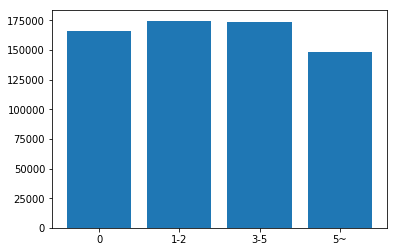

In [15]:
#2-1
"""(
Your code here
"""
grp = app_train['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(['CNT_CHILDREN_GROUP'])['AMT_INCOME_TOTAL']
aa=grouped_df.mean()
print(aa)
plt.bar(['0','1-2','3-5','5~'], height=aa)
plt.show()


TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64


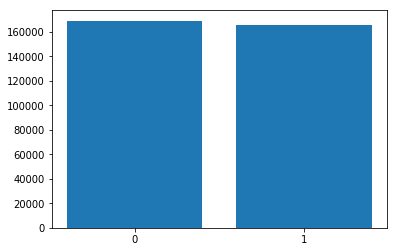

In [7]:
grp = app_train['TARGET']

grouped_df1 = app_train.groupby(grp)['AMT_INCOME_TOTAL']
aa=grouped_df1.mean()
print(aa)
plt.bar(['0','1'], height=aa)
plt.show()

In [ ]:
app_train['AMT_CREDIT_Norm1'] = ( value - np.mean(value) ) / ( np.std(value) )
app_train['AMT_CREDIT_Norm1'].hist(bins = 50)
plt.title("Normalized with Z-transform")
plt.show()

ValueError: Buffer has wrong number of dimensions (expected 1, got 3)

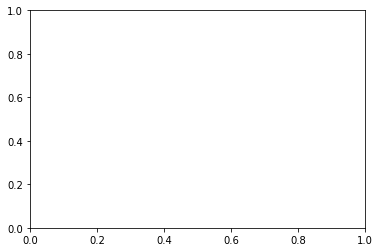

In [12]:
#2-2
"""
Your code here
"""
plt_column = grouped_df1
plt_by = app_train['TARGET'].values

app_train.boxplot(column=grouped_df1)#, labels = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [ ]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()